#credit card fraud detection system


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier



In [16]:
dataset=pd.read_csv(r"/content/creditcard.csv")

In [17]:
dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


In [18]:
dataset.shape

(158602, 31)

In [19]:
dataset["Class"].value_counts()

,count
Class,
0.0,158245
1.0,356


In [20]:
dataset.groupby("Class"	).mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,56794.272988,-0.204776,0.041254,0.602823,0.129288,-0.208300,0.071758,-0.083543,0.041708,0.025439,...,0.035020,-0.039806,-0.106025,-0.026515,0.008905,0.107902,0.016377,0.001036,0.002282,87.693471
1.0,55968.873596,-6.057284,4.419181,-8.006879,4.902106,-4.402531,-1.445960,-7.057336,0.778068,-2.884994,...,0.413879,0.767732,-0.017997,-0.045050,-0.073773,0.080805,0.036841,0.181541,0.044143,112.005000


In [21]:
dataset.dropna(subset=["Class"], inplace=True)
x = dataset.iloc[:, :-1]
y = dataset["Class"]


In [22]:
ss=StandardScaler()
x = ss.fit_transform(x)



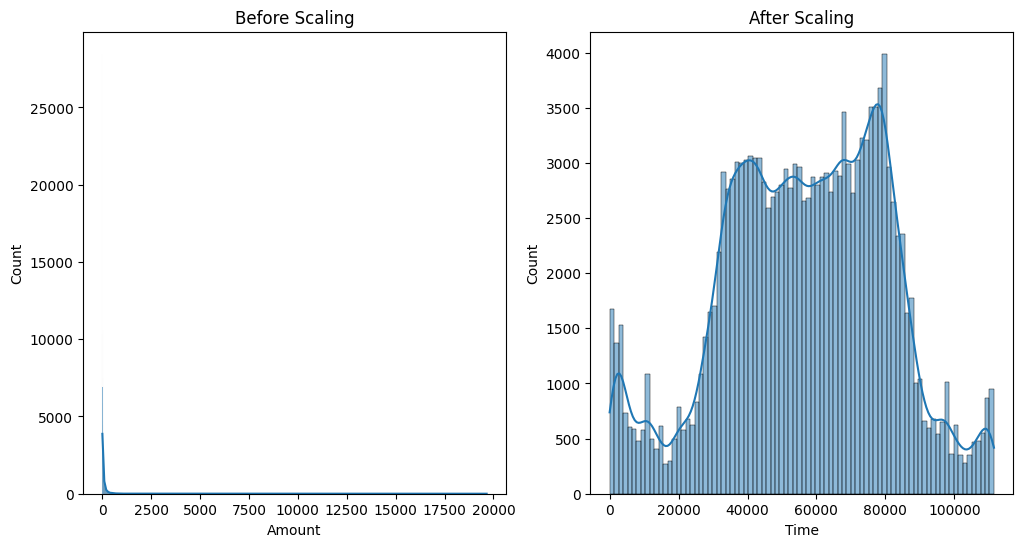

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Before Scaling")
sns.histplot(data=dataset['Amount'], kde=True)  # Replace 'Amount' with your desired column
plt.subplot(1, 2, 2)
plt.title("After Scaling")
sns.histplot(data=dataset['Time'], kde=True)  # Replace 'Time' with your desired column
plt.show()


In [25]:
y.isnull().sum()

0

In [26]:
ru =RandomOverSampler()
# x_ru,y_ru=ru.fit_resample(x,y)
x,y=ru.fit_resample(x,y)

In [27]:
y.value_counts()

,count
Class,
0.0,158245
1.0,158245


In [28]:
x.shape

(316490, 30)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [30]:
# Define hyperparameter grid
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],  # Suitable for classification
    "splitter": ["best", "random"],
    "max_depth": [i for i in range(2, 20)]
}

# Initialize RandomizedSearchCV
rd = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_grid, cv=2,
                        n_iter=5, random_state=42, n_jobs=-1)

# Fit the model
rd.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", rd.best_params_)
print("Best Score:", rd.best_score_)


Best Parameters: {'splitter': 'best', 'max_depth': 15, 'criterion': 'entropy'}
Best Score: 0.9994154633637714


In [31]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
lr.score(x_train,y_train)*100

95.50578217321242

In [33]:
lr_prd=lr.predict(x_test)

In [34]:
lr.score(x_test,y_test)*100

95.59543745457992

In [35]:
input_data = (84206,1.23289937279217,-0.240251118716046,1.19279323937315,0.1469785390002,-1.1360922239604,-0.440721032965324,-0.639570712007113,-0.00643223407618139,0.954806258069604,-0.412003179489391,-0.494954565549762,0.940221699569723,0.981677743359299,-0.633072373783887,0.195226516325603,0.119372170604586,-0.128871130122328,-0.502492229558258,0.230272799869384,-0.0206011527385234,-0.112662350557494,-0.0690303125959454,0.0559079741392006,0.493263922380135,0.146680674336735,0.987942179055978,-0.0267067830939117,0.0170371472859142,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lr.predict(input_data_reshaped)
print(prediction)

[1.]


In [36]:
if (prediction[0] == 0):
  print('The Transaction Is Not A Fraud')
else:
  print('The Transaction Is A Fraud')

The Transaction Is A Fraud


In [37]:
print(classification_report(y_test,lr_prd))
cf = confusion_matrix(y_test, lr_prd)

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     31649
         1.0       0.98      0.93      0.95     31649

    accuracy                           0.96     63298
   macro avg       0.96      0.96      0.96     63298
weighted avg       0.96      0.96      0.96     63298



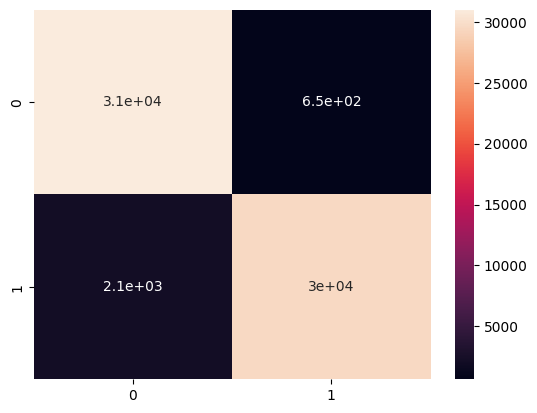

In [38]:
sns.heatmap(cf,annot=True)
plt.show()